In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('/content/Admission_Predict.csv')

In [5]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
data.drop(["Serial No."],axis=1,inplace=True)

In [7]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [10]:
data.isnull().any()

GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [11]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [12]:
data.nunique()

GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 168
Research               2
Chance of Admit       60
dtype: int64

In [13]:
df = pd.DataFrame(data)

In [14]:
df.columns = df.columns.str.replace(' ', '_')

In [15]:
print("\n\n", df)



      GRE_Score  TOEFL_Score  University_Rating  SOP  LOR_  CGPA  Research  \
0          337          118                  4  4.5   4.5  9.65         1   
1          324          107                  4  4.0   4.5  8.87         1   
2          316          104                  3  3.0   3.5  8.00         1   
3          322          110                  3  3.5   2.5  8.67         1   
4          314          103                  2  2.0   3.0  8.21         0   
..         ...          ...                ...  ...   ...   ...       ...   
395        324          110                  3  3.5   3.5  9.04         1   
396        325          107                  3  3.0   3.5  9.11         1   
397        330          116                  4  5.0   4.5  9.45         1   
398        312          103                  3  3.5   4.0  8.78         0   
399        333          117                  4  5.0   4.0  9.66         1   

     Chance_of_Admit_  
0                0.92  
1                0.76  


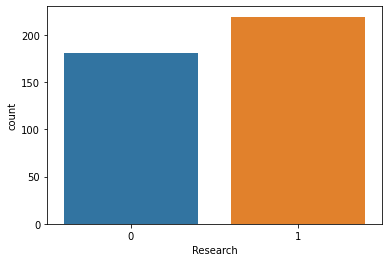

In [16]:
sns.countplot(x="Research",data=data)

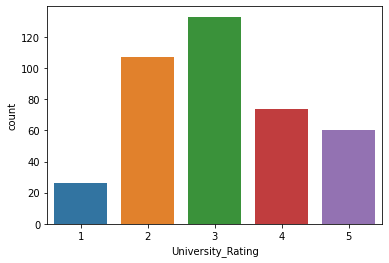

In [17]:
sns.countplot(x="University_Rating",data=data)

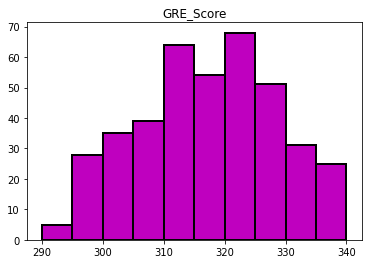

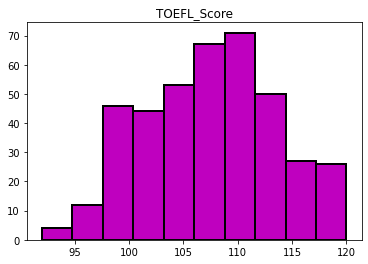

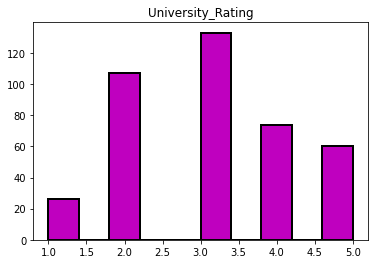

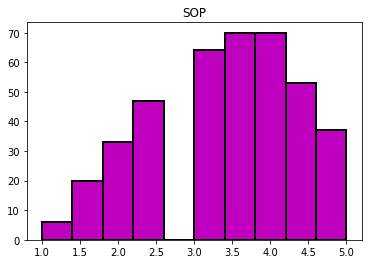

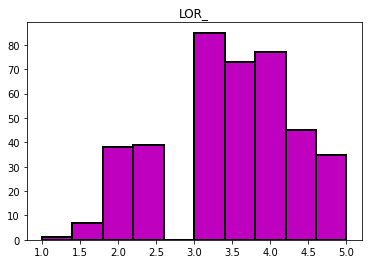

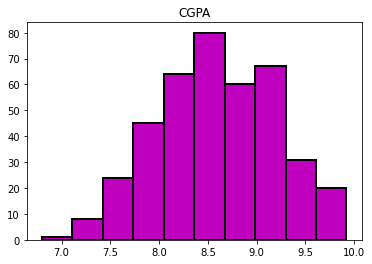

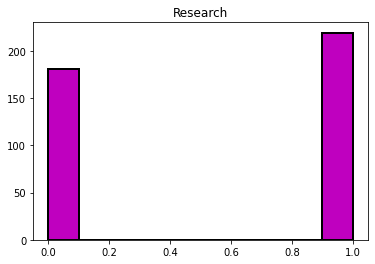

In [18]:
num_features = ['GRE_Score','TOEFL_Score','University_Rating','SOP','LOR_','CGPA','Research']

for i in num_features:
    plt.hist(df[i], color='m', edgecolor='black', linewidth=2)
    plt.title(i)
    plt.show()

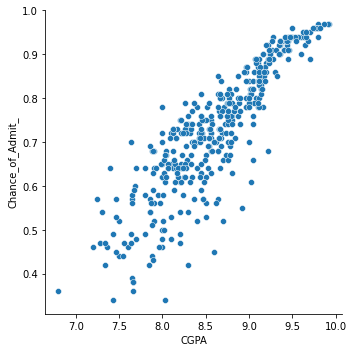

In [19]:
sns.relplot(x='CGPA',y='Chance_of_Admit_',data=data)

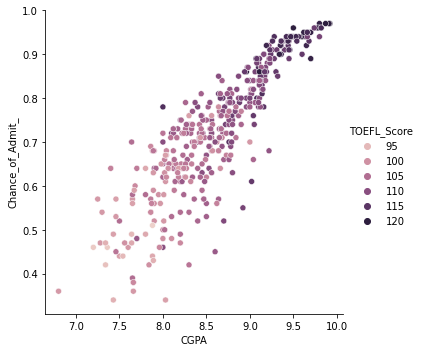

In [20]:
sns.relplot(x='CGPA',y='Chance_of_Admit_',hue='TOEFL_Score',data=data)

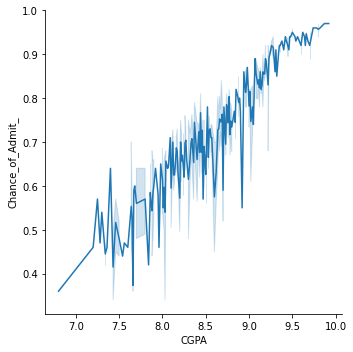

In [21]:
sns.relplot(x='CGPA',y='Chance_of_Admit_',data=data,kind="line")

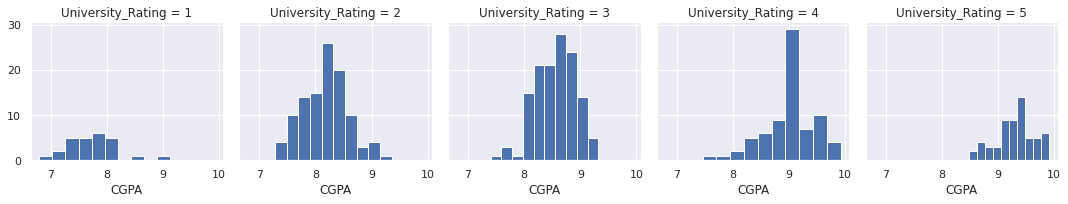

In [22]:
sns.set(style="darkgrid")
b=sns.FacetGrid(data,col="University_Rating")
b.map(plt.hist,"CGPA")

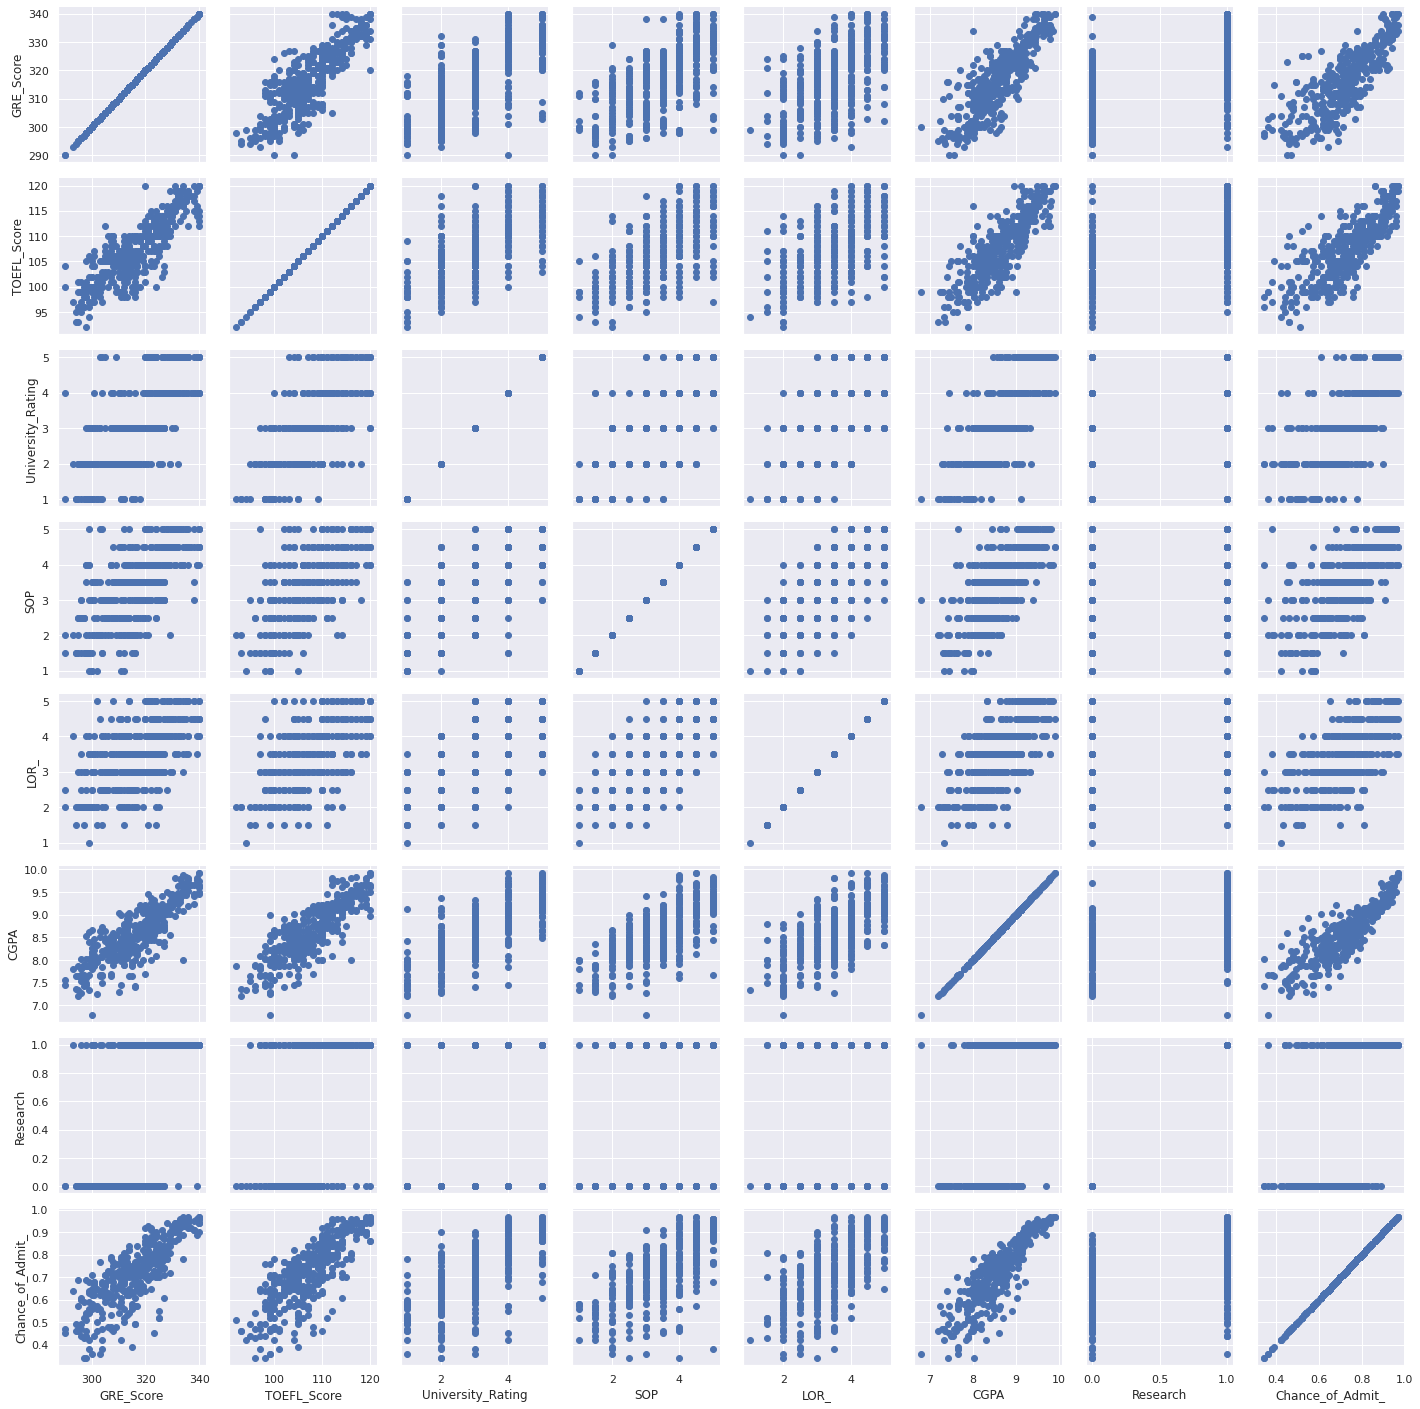

In [23]:
b=sns.PairGrid(data)
b.map(plt.scatter)


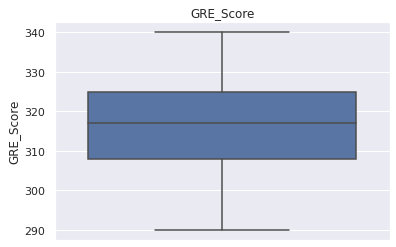

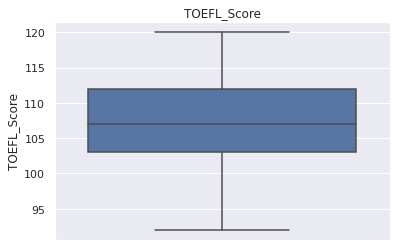

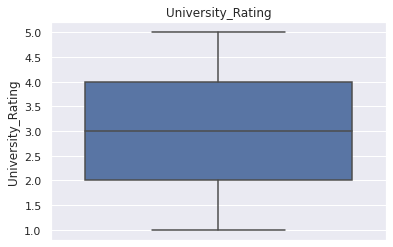

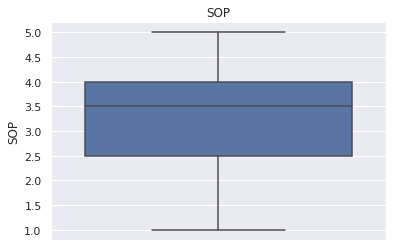

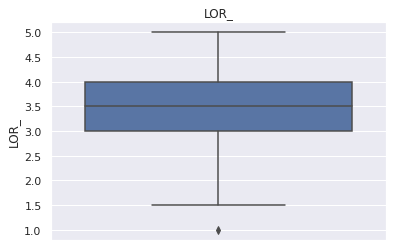

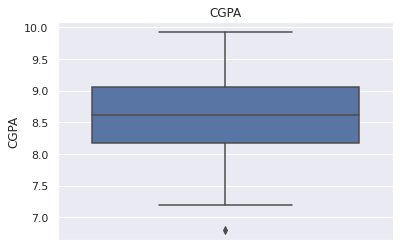

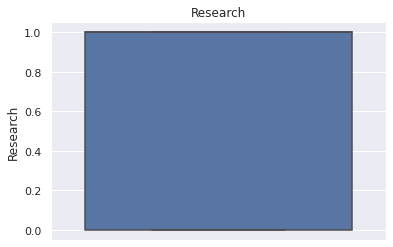

In [24]:
for i in num_features:
    sns.boxplot(y=df[i])
    plt.title(i)
    plt.show()

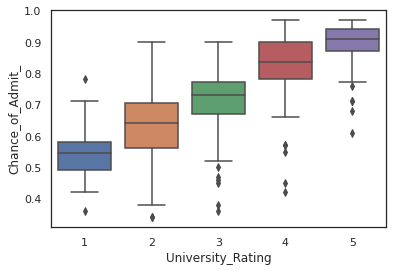

In [25]:
sns.set(style="white",color_codes=True)
sns.boxplot(x='University_Rating',y='Chance_of_Admit_',data=data)

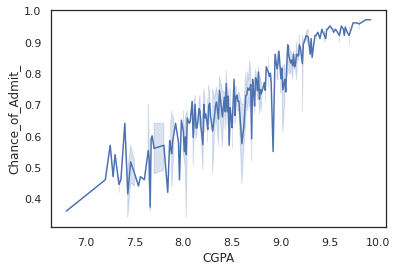

In [26]:
sns.lineplot(x=data.CGPA,y=data.Chance_of_Admit_)

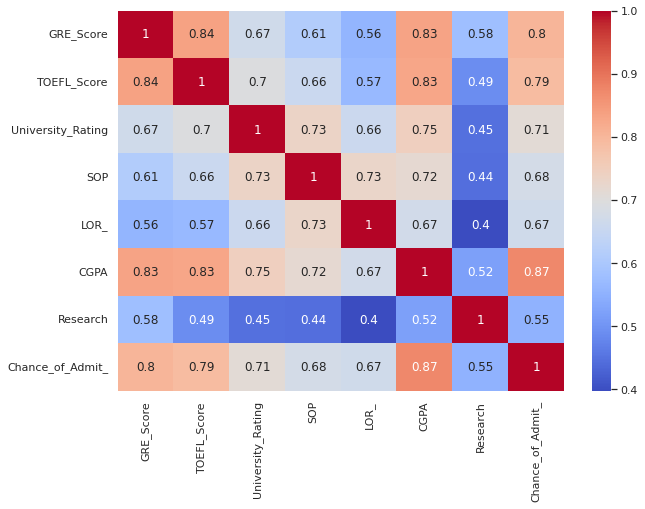

In [27]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()


In [28]:
independent = data.iloc[:,0:7].values
dependent = data.iloc[:,7:].values

In [29]:
independent.shape

(400, 7)

In [30]:
dependent.shape

(400, 1)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(independent, dependent, random_state=0, train_size = .2)